# consider lead accumulation model

AinvF = [  -1800.09702788    -698.63905628 -200582.24024979]


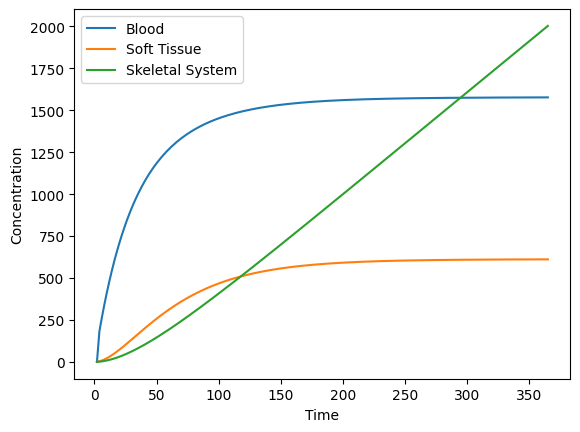

In [1]:
# show analytical solution for compartmental model of lead accumulation

import matplotlib.pyplot as plt
from numpy import linspace, matrix, dot, zeros
from scipy.linalg import inv, expm

def At(A, t):
    # multiplies the matrix A by each time point in t

    Y = t*A
    return Y

# define the matrix containing the rates (in micrograms per day)
A=matrix('-0.0361, 0.0124, 0.000035; 0.0111, -0.0286, 0.0; 0.0039, 0, -0.000035')
# column vector containing rate of input into each compartment
f=[49.3, 0, 0]
# times at which to evaluate model (in days)
t=linspace(2,365,int(366/2))
# steady state value
AinvF=dot(inv(A),f) # dot is matrix multiplication
print('AinvF = ' + str(AinvF))

# make up the sequence of solution vectors
u=zeros((len(t),3))
for i in range(1,len(t)): # for each time in linspace
    u[i,:]=-AinvF+dot(expm(At(A,t[i])),AinvF)

plt.figure()
plt.plot(t,u[:,0],label='Blood')
plt.plot(t,u[:,1],label='Soft Tissue')
plt.plot(t,u[:,2],label='Skeletal System')
plt.xlabel('Time')
plt. ylabel('Concentration')
plt.legend()
#plt.savefig('lec27fig0.png', bbox_inches='tight') #save the plot to a file
plt.show()


#Is this a realistic model?  Why or why not?

That would be 200 grams of lead in the bones... not exactly survivable

#Now consider a different type of model (pharmacokinetics)

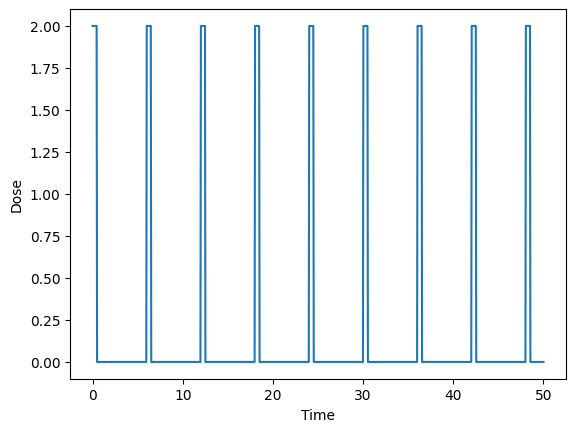

In [2]:
# do numerical simulation for compartmental model with non-constant inputs

import matplotlib.pyplot as plt
from numpy import linspace, array, zeros, mod, floor, meshgrid
from scipy.integrate import odeint
from math import log

def dose(t,Period,Duration,DoseSize): # how often taking, dissovle time, dose size
# dosing function for section 9.11
# if the current t is after the beginning of the nth interval (6*n) but
# less than the beginning plus a half-hour, set the Dose to 1 (0 otherwise)
    Portion = round(1/Duration);
    if(mod(floor(t*Portion),Period*Portion)==0):
        H=DoseSize
    else:
        H=0.
    return H

def drugRate(y,t,Period,Duration,DoseSize):
# used in section 9.11

# define rate constants based on half-lives: a corresponds to a half-life of 30 min and
# b to a half-life of 5 hours
    a=2*log(2); b=log(2)/5;
    Yprime = [ -a*y[0]+2*dose(t,Period,Duration,DoseSize), a*y[0]-b*y[1] ]
    return Yprime

t=linspace(0,50,1000)
Period = 6
Duration = 0.5
DoseSize = 1
Dvect=[]
for k in range(0,len(t)):
    Dvect.append(2*dose(t[k],Period,Duration,DoseSize))

# generate figure showing the dosing schedule (Figure 9.11.1
plt.figure()
plt.plot(t,Dvect)
plt.xlabel('Time')
plt.ylabel('Dose')
#plt.savefig('lec27fig2.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

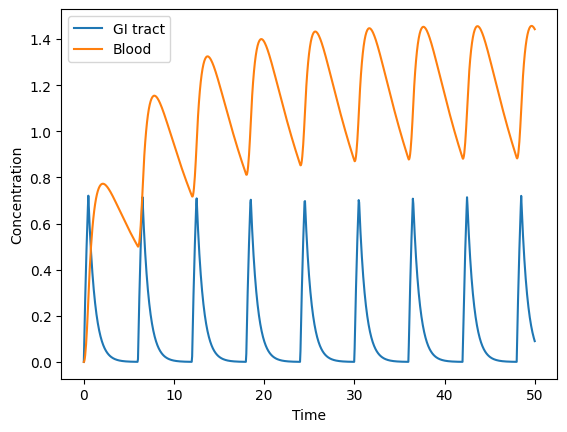

In [3]:
# generate kinetics plot (Figure 9.11.2)
yinit = [0, 0]
params = (Period, Duration, DoseSize)
y=odeint(drugRate,yinit,t,params)
plt.figure()
plt.plot(t,y[:,0],label='GI tract')
plt.plot(t,y[:,1],label='Blood')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
#plt.savefig('lec27fig3.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

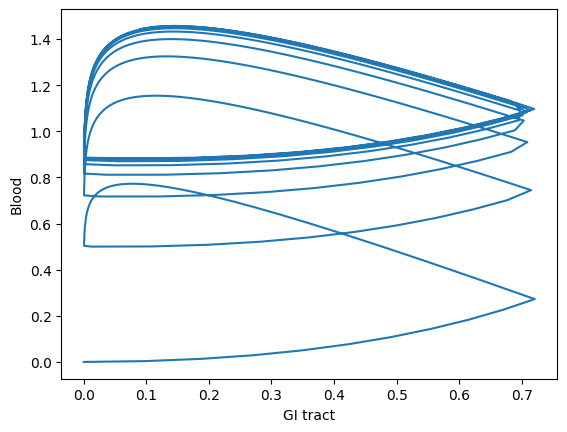

In [4]:
# generate phase plane (Figure 9.11.3)
plt.figure()
plt.plot(y[:,0],y[:,1])
plt.xlabel('GI tract')
plt.ylabel('Blood')
#plt.savefig('lec27fig4.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

#This kind of behavior is called a "limit cycle"
#Is this the same as the behavior we saw for the Lotka-Volterra model?

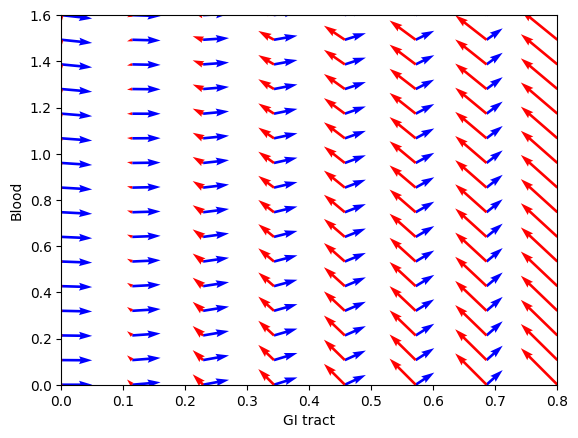

In [5]:
# compare derivatives at two different times
def phaseportrait2(f, y0lim, y1lim, t, color, p1, p2, p3):

    y0 = linspace(y0lim[0], y0lim[1], y0lim[2])
    y1 = linspace(y1lim[0], y1lim[1], y1lim[2])

    Y0, Y1 = meshgrid(y0, y1)

    u, v = zeros(Y0.shape), zeros(Y1.shape)

    NI, NJ = Y0.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y0[i, j]
            y = Y1[i, j]
            yprime = f([x, y], t, p1, p2, p3)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    Q = plt.quiver(Y0, Y1, u, v, color=color)

#    plt.xlabel('$y_0$')
#    plt.ylabel('$y_1$')
    plt.xlim(y0lim[0], y0lim[1])
    plt.ylim(y1lim[0], y1lim[1])

plt.figure()
y0lim = [0, 0.8, 8]
y1lim = [0, 1.6, 16]
phaseportrait2(drugRate,y0lim, y1lim,0,'blue',Period,Duration,DoseSize)
phaseportrait2(drugRate,y0lim, y1lim,1,'red',Period,Duration,DoseSize)
plt.xlabel('GI tract')
plt.ylabel('Blood')
#plt.savefig('lec27fig5.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

#What are some things we could use this type of pharmacokinetics model for?

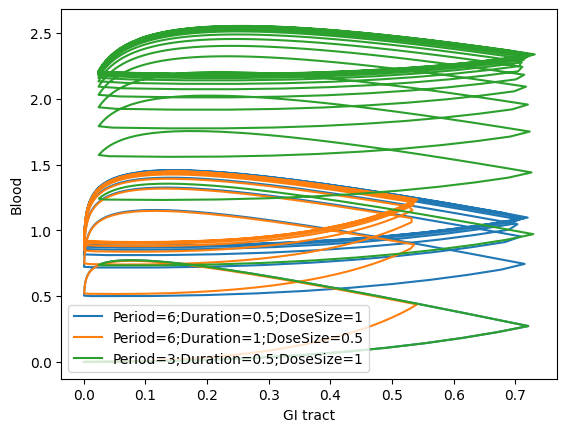

In [6]:
# show effects of changing dosing schedule
plt.figure()
plt.plot(y[:,0],y[:,1],label='Period='+str(Period)+';Duration='+str(Duration)+';DoseSize='+str(DoseSize))
Period=6 #same
Duration=1 #double it
DoseSize=0.5 #decrease it to half
params = (Period, Duration, DoseSize)
y=odeint(drugRate,yinit,t,params)
plt.plot(y[:,0],y[:,1],label='Period='+str(Period)+';Duration='+str(Duration)+';DoseSize='+str(DoseSize))
Period=3 #half
Duration=0.5 #back to original
DoseSize=1 #back to original
params = (Period, Duration, DoseSize)
y=odeint(drugRate,yinit,t,params)
plt.plot(y[:,0],y[:,1],label='Period='+str(Period)+';Duration='+str(Duration)+';DoseSize='+str(DoseSize))
plt.xlabel('GI tract')
plt.ylabel('Blood')
plt.legend()
#plt.savefig('lec27fig6.png', bbox_inches='tight') #save the plot to a file
plt.show()